### **5.1 Load packages**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
# ignore warnings
import warnings
warnings.filterwarnings("ignore")


### **5.2 Read dataset**

In [2]:
# load dataset
df = pd.read_csv('./bike.csv')

### **5.3 Preview dataset**

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### **5.4 Summary of dataset**

In [5]:
# view summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


- We can see that there are 6 columns in the dataset and there are no missing values.

### **5.5 Check the distribution of target variable**

-  Target variable is `workingday`
-  check the distribution of the target variable.

In [7]:
# check the distribution of the target variable
df['workingday'].value_counts()

workingday
1    7412
0    3474
Name: count, dtype: int64

- The target variable is `workingday`. It contains 2 values - 0 and 1. 

- `0` is for **Negative prediction** and `1` for **Positive prediction**.

- We  can see that the problem is binary classification task.

In [ ]:
# Convert datetime columns to numeric attributes
df['year'] = pd.to_datetime(df['datetime']).dt.year
df['month'] = pd.to_datetime(df['datetime']).dt.month
df['day'] = pd.to_datetime(df['datetime']).dt.day
df['hour'] = pd.to_datetime(df['datetime']).dt.hour
df = df.drop('datetime', axis=1)

This code processes the datetime column by breaking it down into numerical components like year, month, day, and hour. Finally, it removes the original datetime column.

Convert to datetime type:
Using pd.to_datetime, the values in the datetime column are converted to Pandas' datetime type.
Extract features:
.dt.year: Extracts the year.
.dt.month: Extracts the month.
.dt.day: Extracts the day.
.dt.hour: Extracts the hour.
Remove the original column:
The datetime column is dropped using df.drop as it's no longer needed.


### **5.6 Declare feature vector and target variable**

In [12]:
X = df.drop('workingday', axis=1)

y = df['workingday']

### **5.7 Split data into training and test set**

In [13]:
# split the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### **5.8 LightGBM model development and training**


- We need to convert our training data into LightGBM dataset format(this is mandatory for LightGBM training).

- After creating the necessary dataset, we created a python dictionary with parameters and their values. 

- Accuracy of the model depends on the values we provide to the parameters.

- In the end block of code, we simply trained model with 100 iterations.

In [18]:
# build the lightgbm model
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 5194, number of negative: 2426
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.105454 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1046
[LightGBM] [Info] Number of data points in the train set: 7620, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.681627 -> initscore=0.761260
[LightGBM] [Info] Start training from score 0.761260


LGBMClassifier()

### **5.9 Model prediction**

In [16]:
# predict the results
y_pred=clf.predict(X_test)

### **5.10 Model accuracy**

In [19]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9483


- Here, `y_test` are the true class labels and `y_pred` are the predicted class labels in the test-set.

### **5.11 Compare train and test set accuracy**

- Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [20]:
y_pred_train = clf.predict(X_train)

In [21]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9854


### **5.12 Check for overfitting**

In [22]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.9854
Test set score: 0.9483


- The training and test set accuracy are quite comparable. So, we cannot say there is overfitting.

### **5.13 Confusion-matrix**

In [24]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 926  122]
 [  47 2171]]

True Positives(TP) =  926

True Negatives(TN) =  2171

False Positives(FP) =  122

False Negatives(FN) =  47


<Axes: >

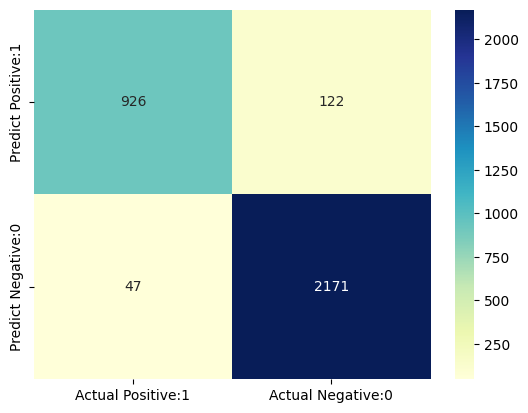

In [25]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### **5.14 Classification metrices** 

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.88      0.92      1048
           1       0.95      0.98      0.96      2218

    accuracy                           0.95      3266
   macro avg       0.95      0.93      0.94      3266
weighted avg       0.95      0.95      0.95      3266

